In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad_data=pd.read_csv("D:/Dataset_3ri/advertising (1).csv")

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data['Clicked on Ad']

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [5]:
ad_data.shape

(1000, 10)

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

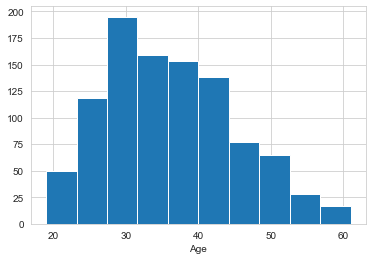

In [9]:
#EDA
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=10)
plt.xlabel('Age')
plt.show()

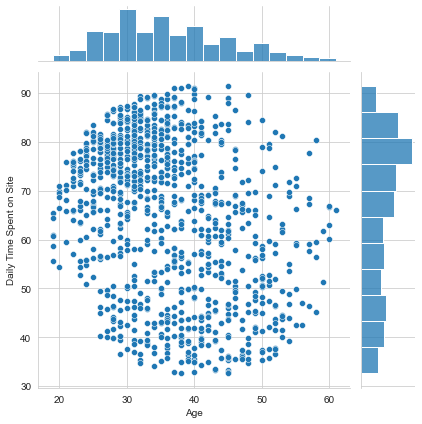

In [10]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data)

<AxesSubplot: xlabel='Age', ylabel='Daily Time Spent on Site'>

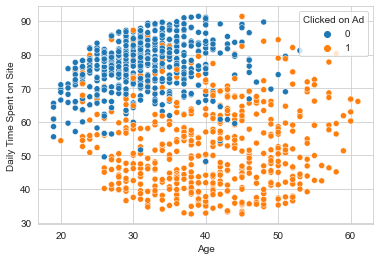

In [11]:
sns.scatterplot(x='Age',y='Daily Time Spent on Site',hue='Clicked on Ad',data=ad_data)

In [12]:
#eda
pd.crosstab(ad_data['Country'],ad_data['Clicked on Ad']).sort_values(1,ascending=False).tail(15)

Clicked on Ad,0,1
Country,,
Gibraltar,3,0
India,2,0
Sudan,2,0
Sri Lanka,4,0
Jordan,1,0
Slovakia (Slovak Republic),2,0
Lesotho,1,0
Malaysia,3,0
Mozambique,1,0


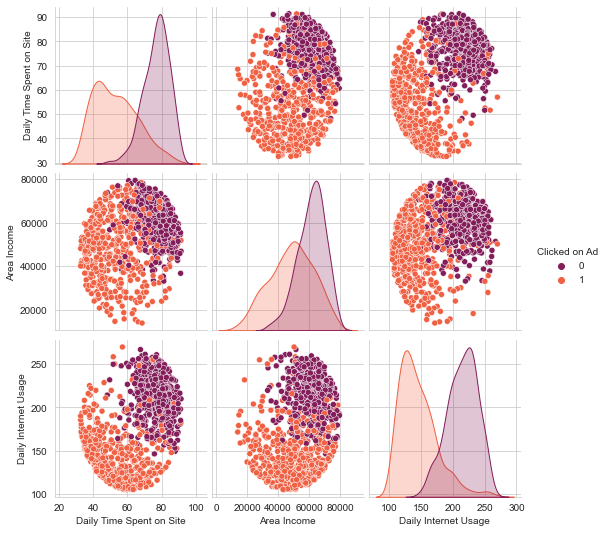

In [13]:
#rel in b/w dep & indep variables:
sns.pairplot(ad_data,hue='Clicked on Ad',vars=['Daily Time Spent on Site','Area Income','Daily Internet Usage'],palette='rocket')

C:\Users\HP\AppData\Local\Temp\ipykernel_2812\3639431380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ad_data.corr(),cmap='viridis',annot=True)


<AxesSubplot: >

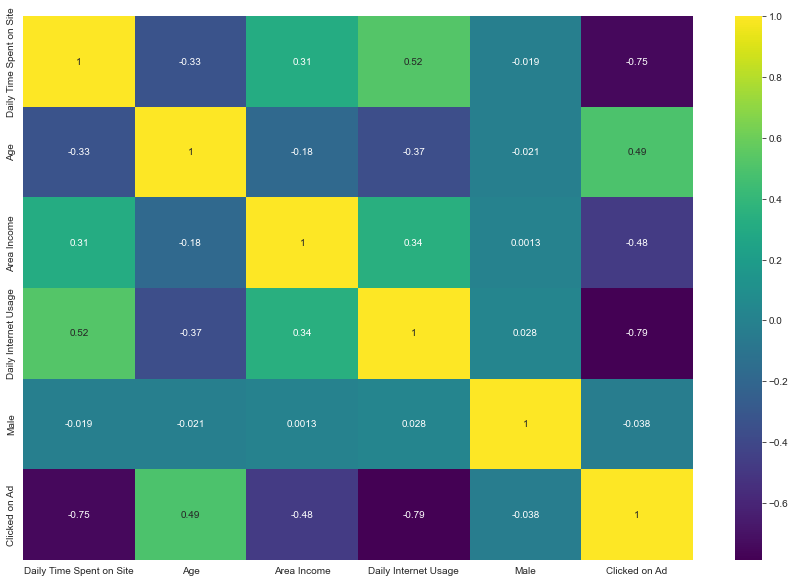

In [14]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(ad_data.corr(),cmap='viridis',annot=True)

In [15]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [16]:
#Train-Test split:
from sklearn.model_selection import train_test_split

In [17]:
X=ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y=ad_data['Clicked on Ad']

In [18]:
#splits
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#To assign the model to my dataset
logmodel=LogisticRegression(solver='lbfgs')

In [21]:
#we have to fit this model in our dataset:
#will be fitting the model in train dataset
logmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
#have to make the prediction on the basis of my num. variables.
predictions=logmodel.predict(X_test)
#if we want to predict on y then we need to use X_test

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       105
           1       0.93      0.88      0.91        95

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [25]:
#linear_regression: both variable are numerical
#logistic_regression : dependent are categorical or boolean and ind.var:numerical

In [26]:
#Inferences will be:
#precision and recall : Accuracy of my model.
#people who will click on my ad is 1: 93% of the people shall come and will click on my add

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))

[[99  6]
 [11 84]]


In [29]:
#no of people who can click on my add: 99
#no of people who are not supposed to click on my ad: 84

#The ad campaign needs to be consistently monitored so that it shouldn't incur losses